In [1]:
import sys

sys.path.append("..")

import tensorflow as tf

import numpy as np

from utils import tf_config

dataset="01"
memory_limit=1500
n_individuals=10
interval_eeg=10
seed=8#works: 2,3,5

tf_config.set_seed(seed=seed)
tf_config.setup_tensorflow(device="GPU", memory_limit=memory_limit)

import GPyOpt

import argparse

from utils import preprocess_data, search_algorithms, train, losses_utils, metrics, bnn_utils, eeg_utils, viz_utils

from models import fmri_ae, eeg_to_fmri, uniconv_fmri

from layers import locally_connected, fourier_features

import matplotlib.pyplot as plt

import gc

import os

from sklearn.model_selection import train_test_split, KFold

import time

from scipy.stats import ttest_ind

with tf.device('/CPU:0'):
    train_data, _ = preprocess_data.dataset(dataset, n_individuals=n_individuals,
                                            interval_eeg=interval_eeg, 
                                            ind_volume_fit=False,
                                            standardize_fmri=True,
                                            iqr=False,
                                            verbose=True)
    eeg_train,fmri_train=train_data

2021-12-30 09:03:16.800022: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-12-30 09:03:19.508172: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-30 09:03:19.513642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-30 09:03:19.590110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 09:03:19.591385: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX150 computeCapability: 6.1
coreClock: 1.5315GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2021-12-30 09:03:19.591486: I tensorflow/stream_executor/platform/default/dso_l

I: Starting to Load Data
I: Finished Loading Data
I: Pairs Created


In [2]:
eeg_train = eeg_train[:100]
fmri_train = fmri_train[:100]

In [7]:
res1=np.load("/tmp/residues_1.npy", allow_pickle=True)
res2=np.load("/tmp/residues_1.npy", allow_pickle=True)

pvalues=ttest_ind(res1, res2, axis=0).pvalue

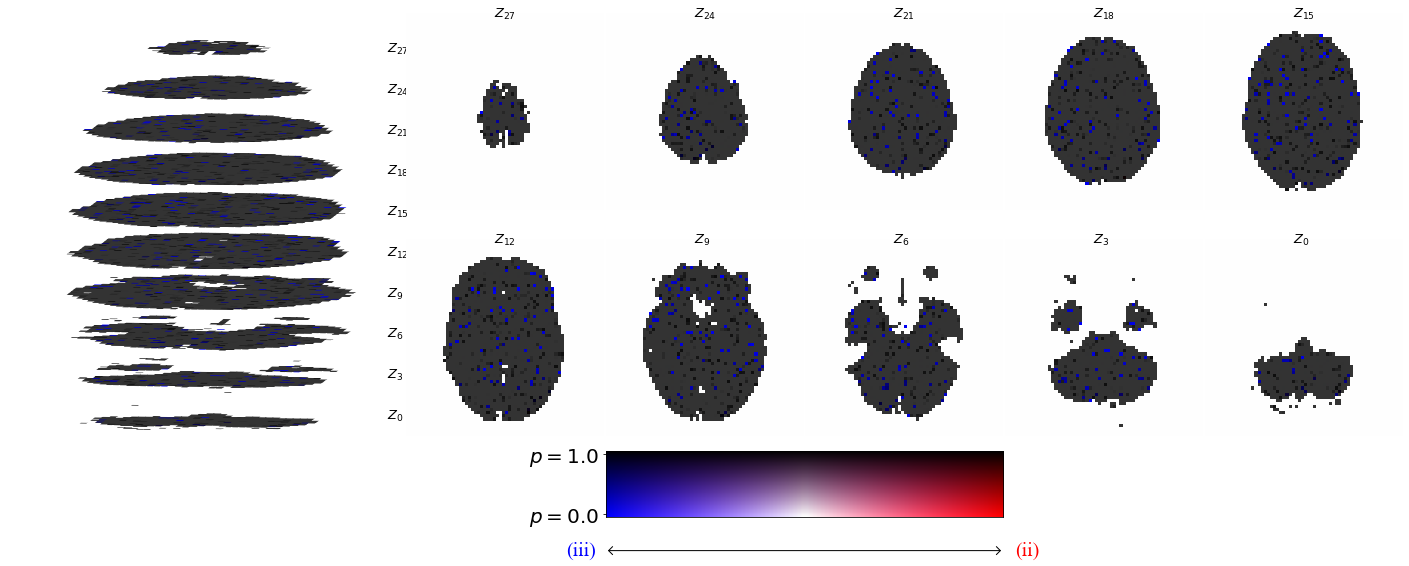

In [63]:
import importlib
importlib.reload(viz_utils)

fig=viz_utils.comparison_plot_3D_representation_projected_slices(np.mean(res1,axis=0), np.mean(res2, axis=0), pvalues, 
                                                                 np.mean(fmri_train, axis=0),
                                                                model1="(iii)",
                                                                 model2="(ii)",)
fig.show()